# Equalisation

## About Equalisation

A parametric EQ is a type of equalisation that is used to control and manipulate specific frequency components within an audio signal. Unlike typical graphic equalisers which have fixed frequency bands, parametric EQ's provide higher levels of flexibility and precision by allowing the user to control the frequency, gain and Q of each band.

EQ's can be useful to shape and sculpt a sound, helping an instrument be heard in a complex mix, or to deliberately add colouration to an instrument’s sound by boosting or reducing a particular frequency range (Välimäki and Reiss 2016).
There are two main filter designs that can be used in parametric EQ's, Infinite Impulse Reponse (IIR) and Finite Impulse Reponse (FIR). IIR filters allow for efficient designs with fewer coefficients due to the feedback component. However, this can subsequently inherit phase and stability issues. FIR filters are non-recursive, providing a linear phase response and enhanced stability. However, they require more coefficients which means they can be a lot more computationally expensive.

This project uses IIR filters as in a real time scenario (like in typical audio plugin designs), minimal latency is of high importance.

### Parameters

- **Frequency** specifies the central or pivot frequency. In cut off and shelving filters the frequency parameter represents the "corner frequency" where the filter's gain change begins. However, in a peaking or notch filter the parameter represents the central point of the band, where its at the maximum attenuation or amplification.
- **Q Factor** is used to shape the filter and behaves differently on certain filter and types. On cut off and shelving bands a lower Q factor will create a gradual slope however a higher Q will create a gain boost at the corner frequency. However, the Q factor on notch and peaking bands will increase or decrease the bandwidth of the filter eitherside of the center frequency.
- **Gain** will increase or decrease the amplitude of the filter band. Cut off filters don't have a gain parameter. In shelving filters, the gain will amplify or attenuate all frequencies between the center frequency and the min or max frequency. Gain on peaking filters will boost or decrease the gain at the center frequency.

<hr>

## Peaking and Notch Filters

A peaking filter is a type of equaliser band that is used to boost or attenuate the amplitude of a specific frequency band. The name "peaking" band describes the filter as it creates either a peak or dip in the frequency response. The Q or bandwidth can allow the user to precisely target specific frequencies or frequency ranges.

This filter band can be used in corrective scenarios such as to reduce resonant frequencies, cut out unwanted noise, or enhance specific tonal characteristics. However, peaking bands can also be used creatively for instance adding warmth to vocals, emphasizing the punch of a kick drum, or making a guitar solo stand out.

In general a peaking filter can be designed using low-pass and high-pass or band-pass filters, along with an amplifier to adjust the gain of the filter at the center frequency.

Below demonstrates a typical second order peaking filter:

$$
H\left(s\right)=\frac{s^2 +s\cdot \left(\frac{A}{Q}\right)+1}{s^2 +\frac{s}{\left(A\cdot Q\right)}+1}
$$

And below demonstrates a typical second order notch filter:

$$
H(s)={\frac{s^{2}+1}{s^{2}+{\frac{s}{Q}}+1}}
$$

**H(s)** represents the transfer function of the filter in the laplace domain. Commonly used in linear time-invariant (LTI) systems.

**s** is the complex frequency variable (at the center frequency).

**A** is the gain in dB at the center frequency, which can either be attenuated or boosted.

**Q** is the quality factor, which determines the shape of the peak in the frequency response, with higher values of Q resulting in a narrower peak. This can be used to either notch out specific frequencies with high Q factors or boost a wide range of frequencies with a low Q factor.

```python
...
# - Example of a peaking IIR filter coefficient calculation in the Z domain

# Calculate the angular frequency from frequency in hertz
w0 = 2 * np.pi * frequency / fs

# Calculate the alpha value based on the Q factor and angular frequency
alpha = np.sin(w0) / (2 * q)

# Converting decibel gain into linear magnitude 0 to 1
A = 10 ^ (dBgain / 40)

# Calculating the peaking filter coefficients
b0 =   1 + alpha * A
b1 =  -2 * np.cos(w0)
b2 =   1 - alpha * A
a0 =   1 + alpha / A
a1 =  -2 * np.cos(w0)
a2 =   1 - alpha / A
...
```

```python
...
# - Example of a notch IIR filter coefficient calculation in the Z domain

# Calculate the alpha value based on the Q factor and angular frequency
alpha = np.sin(w0) / (2 * q)

# Calculating the notch filter coefficients
b0 = 1
b1 = -2*np.cos(w0)
b2 = 1
a0 = 1 + alpha
a1 = -2*np.cos(w0)
a2 = 1 - alpha
...
```

<hr>

## Shelving Filters

A shelving filter is a type of EQ band that is used to adjust the balance of a band of audio frequencies above or below a certain corner frequency. There are two main types of shelving filters, a high shelf and a low shelf. Parametric EQ's tend to only have no more than one of each shelf filter band.

Low shelves tend to be used to subtly add warmth, depth, and richness which can make a bass instrument sound fuller. Whereas high shelves can enhance presence, clarity, and brightness, for instance making vocals or cymbals more prominent in a mix.

Below demonstrates a typical second order low shelf filter:

$$
H\left(s\right)=A\cdot \frac{s^2 +\left(\frac{\sqrt{A}}{Q}\right)\cdot s+A}{{A\cdot s}^2 +\left(\frac{\sqrt{A}}{Q}\right)\cdot s+1}
$$

And below demonstrates a typical second order high shelf filter (which just flips the numerator and denominator):

$$
H\left(s\right)=A\cdot \frac{{A\cdot s}^2 +\left(\frac{\sqrt{A}}{Q}\right)\cdot s+1}{s^2 +\left(\frac{\sqrt{A}}{Q}\right)\cdot s+A}
$$

**s** is the complex frequency variable (at the corner frequency / slope of the shelf filter).

**A** is the gain in dB from the corner frequency to either the highest or lowest frequency depending on the shelf type, which can either be attenuated or boosted.

**Q** is the quality factor, which determines the shape of the slope in the frequency response, with higher values of Q resulting in a harsher slope. High Q values may also create a boost / notch in gain at the corner frequency.

```python
...
# - Example of a shelving IIR filter coefficient calculation in the Z domain

# Calculate the angular frequency from frequency in hertz
w0 = 2 * np.pi * frequency / fs

# Calculate the alpha value based on the Q factor and angular frequency
alpha = np.sin(w0) / (2 * q)

# Converting decibel gain into linear magnitude 0 to 1
A = 10 ^ (dBgain / 40)
...
```

```python
...
# Calculating low shelf filter coefficients
b0 = A*( (A+1) - (A-1)*np.cos(w0) + 2*np.sqrt(A)*alpha)
b1 = 2*A*( (A-1) - (A+1)*np.cos(w0))
b2 = A*( (A+1) - (A-1)*np.cos(w0) - 2*np.sqrt(A)*alpha)
a0 = (A+1) + (A-1)*np.cos(w0) + 2*np.sqrt(A)*alpha
a1 = -2*( (A-1) + (A+1)*np.cos(w0))
a2 = (A+1) + (A-1)*np.cos(w0) - 2*np.sqrt(A)*alpha
...
```

```python
...
# Calculating high shelf filter coefficients
b0 = A*( (A+1) + (A-1)*np.cos(w0) + 2*np.sqrt(A)*alpha)
b1 = -2*A*( (A-1) + (A+1)*np.cos(w0))
b2 = A*( (A+1) + (A-1)*np.cos(w0) - 2*np.sqrt(A)*alpha)
a0 = (A+1) - (A-1)*np.cos(w0) + 2*np.sqrt(A)*alpha
a1 = 2*( (A-1) - (A+1)*np.cos(w0))
a2 = (A+1) - (A-1)*np.cos(w0) - 2*np.sqrt(A)*alpha
...
```
<hr>

## Cut Off Filters
A cut off band filter is a type of EQ band that is used to attenuate or completely remove certain frequencies above or below a certain cut off frequency. There are two main types of cut off filters, a high cut and a low cut. Parametric EQ's tend to only have no more than one of each cut off filter band.

A low cut filter, also known as a high-pass filter, is typically used to eliminate low-frequency rumble, wind noise, or unwanted low-end interference or background noise from recordings.

A high cut filter, also known as a low-pass filter can be used to remove high-frequency hiss, noise or unwanted high-frequency content.
Both filters can be used for creative purposes such as modulating the cut off to create a transition between sections of a song.

Below demonstrates a typical second order low cut filter:

$$
H\left(s\right)=\frac{s^2 }{s^2 +\frac{s}{Q}+1}
$$

And below demonstrates a typical second order high cut filter (replacing the numerator with a constant 1):

$$
H\left(s\right)=\frac{1}{s^2 +\frac{s}{Q}+1}
$$

**s** is the complex frequency variable (at the cut off frequency / slope of the cut off filter).

**A** is the gain in dB from the cut off frequency to either the highest or lowest frequency depending on the shelf type, which slopes down to -infinity.

**Q** is the quality factor, which determines the shape of the slope in the frequency response, with higher values of Q resulting in a harsher slope. High Q values may also create a boost in gain at the cut off frequency.

```python
...
# - Example of a cut off IIR filter coefficient calculation in the Z domain

# Calculate the angular frequency from frequency in hertz
w0 = 2 * np.pi * frequency / fs

# Calculate the alpha value based on the Q factor and angular frequency
alpha = np.sin(w0) / (2 * q)
...
```

```python
...
# Calculating low cut filter coefficients
b0 = (1 + np.cos(w0))/2
b1 = -(1 + np.cos(w0))
b2 = (1 + np.cos(w0))/2
a0 = 1 + alpha
a1 = -2 * np.cos(w0)
a2 = 1 - alpha
...
```

```python
...
# Calculating high cut filter coefficients
b0 = (1 - np.cos(w0)) / 2
b1 = 1 - np.cos(w0)
b2 = (1 - np.cos(w0)) / 2
a0 = 1 + alpha
a1 = -2 * np.cos(w0)
a2 = 1 - alpha
...
```

<hr>

## Biliniear Transform

A bilinear transform (BLT) is commonly used in digital signal processing (DSP) to transform between continuous-time systems to discrete time. In these EQ filter bands, BLT has been used to convert the above linear time-invariant (LTI) equations in the laplace s domain into discrete time z domain filters.

The equation for BLT can be expressed as:

$$
s\gets \frac{1}{\tan \left(\frac{\omega 0}{2}\right)}\cdot \frac{1-z^{-1} }{1+z^{-1} }
$$

This applies a first order bilinear approximation, and compensates for frequency warping.

Frequency warping can occur when there's a miss match between the desired and actual filter characteristics which can create a distortion in the response.

<hr>

## Digital Biquad Filters

There are 4 main types of digital biquad filters: Direct Form I (DF-I), Direct Form II (DF-II), Transposed Direct Form I (TDF-I) and Transposed Direct Form II (TDF-II).

The direct form is a structure commonly used to implement filters described by Linear Constant Coefficient Difference Equations (LCCDEs), particularly in IIR filters.

DF-I is computationally inefficient due to the extra delay elements and can be sensitive to coefficient quantization in fixed-point implementations. However, DF-II has a reduced number of delay elements and interleaves the feedforward and feedback stages, resulting in a more compact and computationally efficient structure.

TDF-II is preferred over DF-II since it implements its zeros (FIR part) before its poles (IIR part), thereby avoiding potential numerical instability for high-gain poles (Smith 2007).

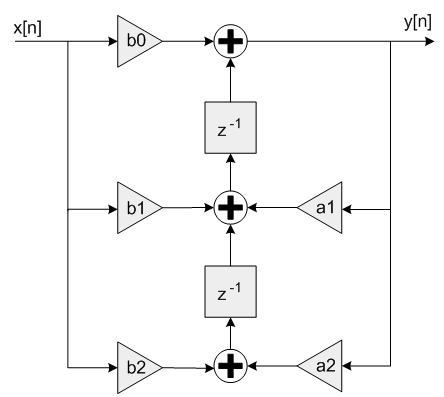

In [2]:
from IPython.display import Image
Image(filename='images/TDF2-diagram.gif')

MATLAB's built-in function filter(b, a, x) implements the TDF-II structure; however, this project contains a custom function that also implements the TDF-II structure, using Fontaine et al.'s (2011) pseudocode example.

<pre>

Algorithm 1
    for j = 0 to number of channels -1 do
        for s = 0 to number of samples -1 do
            Y<sub>j</sub>(s) = B<sub>0j</sub> * X<sub>j</sub>(s) + Z<sub>0j</sub>
            for i = 0 to order - 3 do
                Z<sub>ij</sub> = B<sub>i+1,j</sub> * X<sub>j</sub>(s) + Z<sub>i+1,j</sub> - A<sub>i+1,j</sub> * Y<sub>j</sub>(s)
            end for
            Z<sub>order - 2,j</sub> = B<sub>order - 1,j</sub> * X<sub>j</sub>(s) - A<sub>order - 1,j</sub> * Y<sub>j</sub>(s)
        end for
    end for

</pre>

This TDF2 filter can then be applied to the audio by calling the following custom TDF_II_Biquad() function:

```python
...
# - Example of applying the TDF 2 structure to filter an input signal using IIR coefficients

# Create a low cut filter band object with a frequency of 800 and Q of 0.8
low_cut_band = LowCutBand(800, 0.8, fs)

# Call the 'calculate coefficients' method to get numerator and denominator coefficients
b, a = low_cut_band.calculateCoefficients()

# Apply the b and a coefficients to the input signal using the TDF 2 structure to get the final filtered output
output_signal, _ = TDF_II_Biquad(input_signal, b, a)
...
```

<hr>

## Demonstration of the IIR filter bands

Loading in the audio file

In [3]:
# Importing modules
import matplotlib.pyplot as plt
from librosa import load
import numpy as np

# Clear the workspace, command window, and figures
plt.close('all')

# Reading in the audio samples from the audio file
x, fs = load("audio/guitar.wav", sr=None, mono=True)
#x = in_data[:, 0]  # transposing the audio so it's the correct dimension, and making the audio mono

# Uncomment the line below to normalize the signal
# x = x / np.max(np.abs(x))  # Normalise the signal so it shows better on the graph

The following code will play the original unfiltered audio that has just been read in.

In [4]:
from IPython.display import Audio

Audio(data=x, rate=fs)

### Creating the filter bands for the parametric EQ

The code below uses the filter band classes to create specific filter band objects for the EQ. These filter band classes all derive off of the abstract class 'FilterBand'.

These bands are stored in the filter bands cell array which can be unpacked and passed into the Parametric EQ function.

In [5]:
# Import necessary filter band classes (assuming they are defined in separate files)
from PythonCode.LowCutBand import LowCutBand
from PythonCode.LowShelfBand import LowShelfBand
from PythonCode.NotchBand import NotchBand
from PythonCode.PeakingBand import PeakingBand
from PythonCode.HighShelfBand import HighShelfBand
from PythonCode.HighCutBand import HighCutBand

# Define the sampling frequency (fs)
fs = 44100  # Example sampling frequency, replace with actual value if different

# Create filter band objects for the parametric EQ
filter_bands = [
    LowCutBand(132, 0.8, fs),
    LowShelfBand(300, 1.2, 6, fs),  # Corrected Q Factor value from 1,2.6 to 1.2
    NotchBand(1000, 24.1, fs),
    PeakingBand(1719, 7.6, 10, fs),
    HighShelfBand(6000, 0.5, 5, fs),
    HighCutBand(1152, 1, fs)
]

# You can pass this list of filter bands to your Parametric EQ function for further processing
# parametric_eq_function(filter_bands)

### Plotting the EQ response

The code below unpacks the filter bands cell array into the Plot IIR EQ Response function.

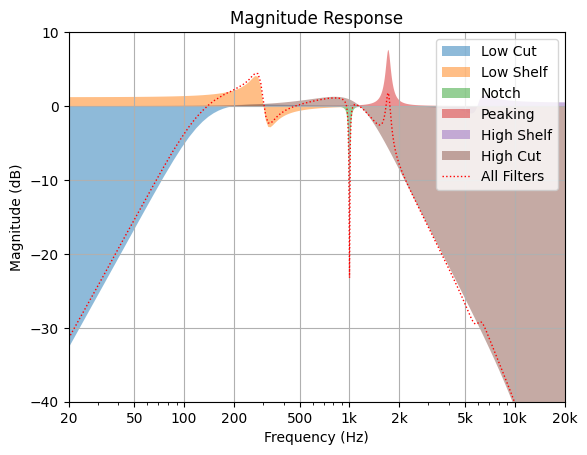

In [7]:
from PythonCode import plotting
import warnings
warnings.filterwarnings("ignore")

plotting.PlotIIREQResponse(*filter_bands)

The plot above shows the various filter band's frequency response. The red line demonstrates all filter bands convoluted, which would be the final frequency response of the parametric EQ.

### Applying the filter to the audio signal

The following code unpacks and passes the filter bands cell array into the Parametric EQ function.
This function will then apply the coefficients by using the Transposed Direct Form II (TDF2) structure.

In [8]:
from PythonCode import ParametricEQ
from PythonCode import TDF_II_Biquad

filtered_signal = ParametricEQ.ParametricEQ(x, *filter_bands)

Audio(data=filtered_signal, rate=fs)

### Analysing a Low Cut filter band

#### Pole Zero Plot

The filter can be viewed on a pole zero plot which shows the relationship between the frequency domain and the Z domain. In the plot below, zero is represented by ' o ' and a pole by ' x '. This checks wether the coefficients are stable or not. If any of the coefficients fall outside of the unit circle, this show instability within the filter.

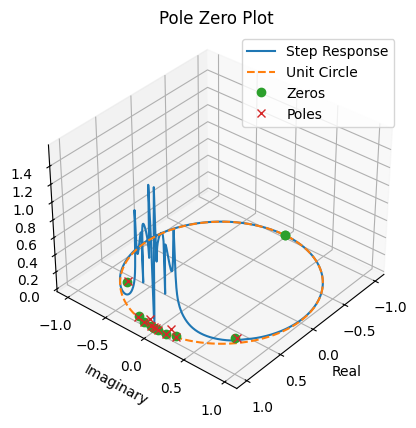

In [9]:
plotting.PlotIIREQPoleZero(*filter_bands)

#### The Step Response

The plot below demonstrates the time-domain behavior and its transient response to input signals. The step response of a system provides insights into both the system's stability and its capacity to transition from one equilibrium state to another. It also provides information on how quickly the filter settles to a steady-state response, ensuring that it doesn't introduce overshoot or excessive ringing

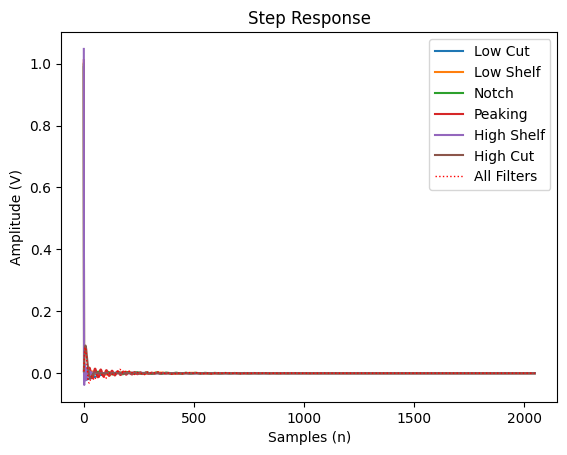

In [10]:
plotting.PlotIIREQStepResponse(*filter_bands)

#### The Phase Response

As this is an IIR filter, the phase response won't have a linear relationship (unlike FIR's) however, its useful to check the filters linearity, group delay, and its ability to preserve signal integrity. The phase response can also help in filter design optimization and to detect filter stability issues.

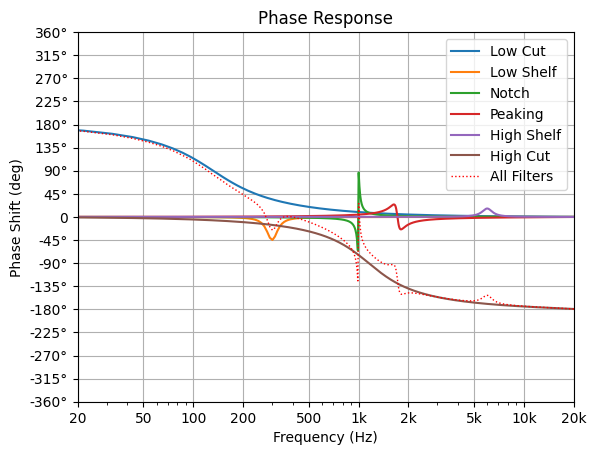

In [11]:
import importlib
importlib.reload(plotting)

plotting.PlotIIREQPhaseResponse(*filter_bands)

## Demonstration of FIR filter design

### Low Pass and High Pass filter design

Below demonstrates how Low Pass and High Pass filters can be designed for FIR.

In [12]:
fc = 400 # center frequency of the filter

The impulse response of an ideal sinc filter stretches from -infinity to infinity. However, in a discrete scenario it can be truncated to the range of -N to N. The overal length of the impulse response is now 2N+1.

In [13]:
N = 100  # (FIR length - 1) / 2
n = np.arange(-N, N+1)  # sample numbers for filter coefficients

A sinc function is then generated.

In [14]:
# Calculate normalized frequency in cycles per sample
wc = fc / fs

# Create FIR coefficients using the sinc function
h = 2 * wc * np.sinc(2 * wc * n)

To convert the low-pass filter into a high-pass:

In [15]:
# Low-pass: False
# High-pass: True

FiltType = False

# Convert the low-pass to a high-pass filter
if FiltType:
    d = -h
    d[N] = 1
    h = d

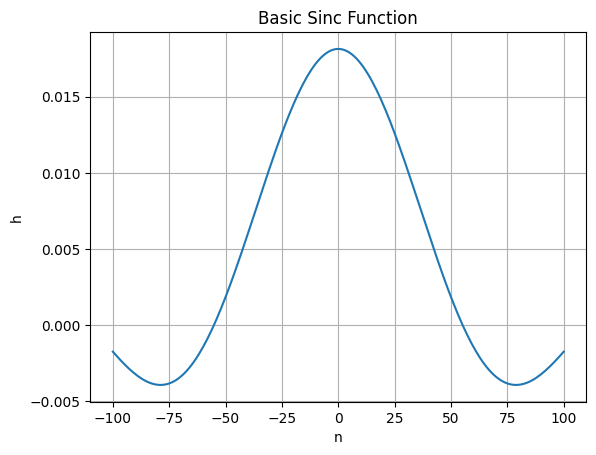

In [16]:
plt.plot(n, h)
plt.title("Basic Sinc Function")
plt.xlabel("n")
plt.ylabel("h")
plt.grid(True)
plt.show()

### Applying a windowing function

The sinc function needs a windowing function applied to improve the frequency response.

Depending on the windowing function used, the response can have a steeper roll-off however, this usually creates more ripples. Here the Blackman-Harris window has been applied.

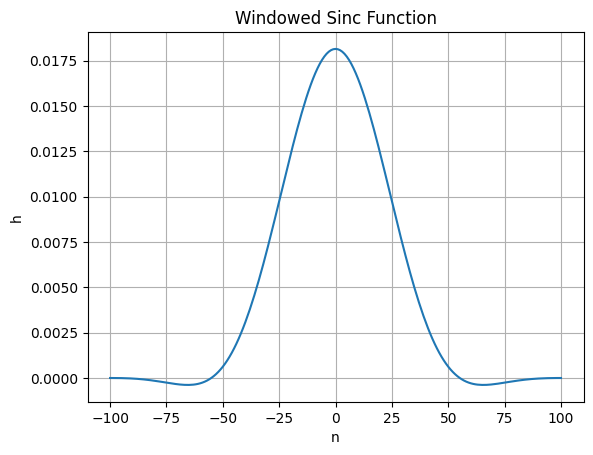

In [17]:
# Generating the Blackman-Harris window
window = np.blackman(len(h))

# Element-wise multiplication to apply the window
h_blackmanharris = h * window

plt.plot(n, h_blackmanharris)
plt.title("Windowed Sinc Function")
plt.xlabel("n")
plt.ylabel("h")
plt.grid(True)
plt.show()

### Plotting the frequency and phase response of the FIR filter

This can then be plotted to display the low-pass / high-pass filter applied.

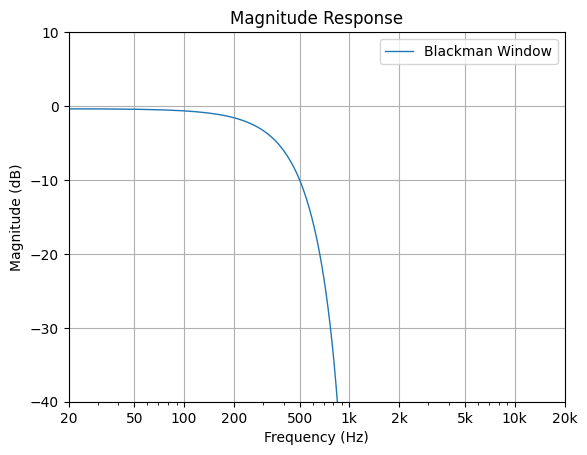

In [18]:
from scipy.signal import freqz
from PythonCode.mag2db import mag2db

# Plot the average filter response for all filter bands convolved
w, h = freqz(h_blackmanharris, a=1, worN=2048, fs=fs)
plt.plot(w, mag2db(np.abs(h)), linewidth=1, label='Blackman Window')

plt.grid(True)  # turn grid on for the plot
plt.legend()

# Setting configurations for the figure
plt.figure(1)

plt.xscale('log')  # set the x axis as logarithmic

plt.ylim([-40, 10])  # setting the y limits to be -40dB to 10dB
plt.xlim([20, 20000])  # setting the x limits to be 20Hz to 20kHz

plt.xticks([20, 50, 100, 200, 500, 1000,
            2000, 5000, 10000, 20000],  # setting the tick frequency number for the x axis
            ["20", "50", "100", "200", "500",
            "1k", "2k", "5k", "10k", "20k"])  # setting the tick frequency labels for the x axis

plt.xlabel('Frequency (Hz)')  # setting the label for the x axis
plt.ylabel('Magnitude (dB)')  # setting the label for the y axis

plt.title("Magnitude Response")
plt.show()

In [19]:
from scipy.signal import convolve

# Applying the filter to audio
filtered_signal = convolve(x, h_blackmanharris, mode='full')
Audio(data=filtered_signal, rate=fs)